In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("./Boston-house-price-data.csv")
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [6]:
x = dataset.drop("MEDV" , axis=1)
y = dataset["MEDV"]

In [ ]:
print(x.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y , train_size=0.2 , random_state=42)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test , y_pred)

In [13]:
print("MSE: " , mse)
print("MAE: " , mae)
print("R2: " , r2)

MSE:  25.56404891117347
MAE:  3.541915034471267
R2:  0.7079608143498466


C:\Users\Dineth Janitha\AppData\Local\Temp\ipykernel_18384\3569006149.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , color="red" , label="Predicted Line")


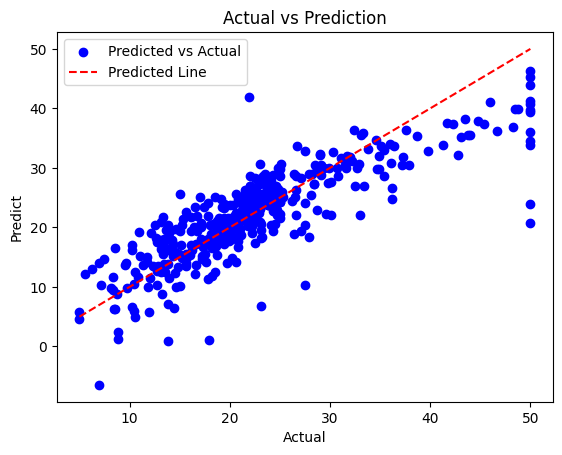

In [24]:
plt.scatter(y_test,y_pred, color="blue" , label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , color="red" , label="Predicted Line")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.title("Actual vs Prediction")

plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print(x_scaled)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [32]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(x, y)


y_pip = pipeline.predict(x_test)



In [35]:
print(y_pip)

[29.07194308 36.10639164 13.75908538 24.55744957 18.58215236 22.94545403
 17.61572573 13.57141932 22.97718032 20.46870847 24.91525464 18.92026211
 -4.28131071 21.26198266 19.45123791 25.57824627 20.56099819  6.4519857
 40.84555721 17.5183465  27.20340972 30.35192656 11.45511759 23.53334055
 18.12427476 16.39147632 22.42817373 15.28000133 22.39251096 19.10854144
 22.97657219 24.88682244 25.30713064 18.22846804 16.94776851 17.28601894
 30.56759672 20.16097176 23.49428992 24.04295712 14.01320787 32.70905124
 43.18949844 17.42153786 27.1190194  17.21225183 14.28275814 25.20148859
 20.16719441 30.00384338 21.58679568 34.33123186 15.83288129 25.59413475
 39.31792393 22.22225914 18.740485   33.43563311 24.78456674 13.39891261
 22.55408869 31.15264947 31.23411512 16.17801106 20.54605423 17.00587718
 20.30445783 26.03576297 31.35762569 12.68725581 20.42320032 27.09887315
 11.51474683 16.59488462 23.35699818  6.55162319 21.43482591 42.03193124
 18.47682833  8.22386687 20.78483633 13.70756369 21.